In [3]:
# tensorflow, tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# 보조 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
raw_data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
type(raw_data)
print(raw_data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [17]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

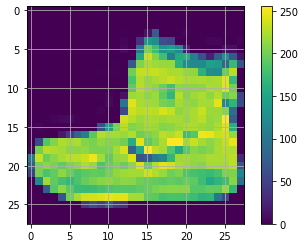

In [19]:
plt.figure() # 시각화를 만들기 전 호출
plt.imshow(train_images[0]) # image show라는 뜻, 이미지를 출력
plt.colorbar() # legend를 호출
plt.grid() # 격자(grid)를 같이 보여줌
plt.show() # 앞 호출 조건에 맞는 시각화를 렌더링

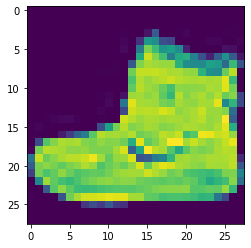

In [20]:
# 거추장스러운 거 떼어내고 바로 렌더링
plt.figure()
plt.imshow(train_images[0])
plt.show()

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

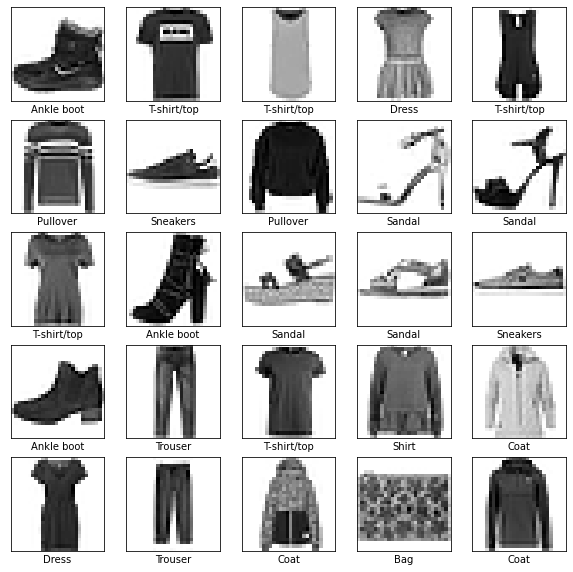

In [25]:
plt.figure(figsize=(10,10)) # figsize는 시각화의 크기이며 단위는 inch
for i in range(25):
  plt.subplot(5, 5, i+1) # 서브플랏의 컨텍스트 설정
  plt.xticks([]) # x축 눈금 간격
  plt.yticks([]) # y축 눈금 간격
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # cm = color mapping, 종류는 필요할 때 찾아서 쓰도록
  plt.xlabel(class_names[train_labels[i]])
  # x축에 라벨링을 설정하는 것
  # 이 경우에는 그림마다 종류가 있으므로 해당 정보를 train_labels에서 가져온 것
plt.show()

In [26]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# 옵션에 대해서 알고 싶다면 https://keras.io/ko/models/model/

In [29]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4914 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3712 - accuracy: 0.8670
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3332 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3105 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.8918


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n테스트 정확도: ', test_acc)

313/313 - 0s - loss: 0.3686 - accuracy: 0.8707

테스트 정확도:  0.8707000017166138


In [37]:
predictions = model.predict(test_images)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

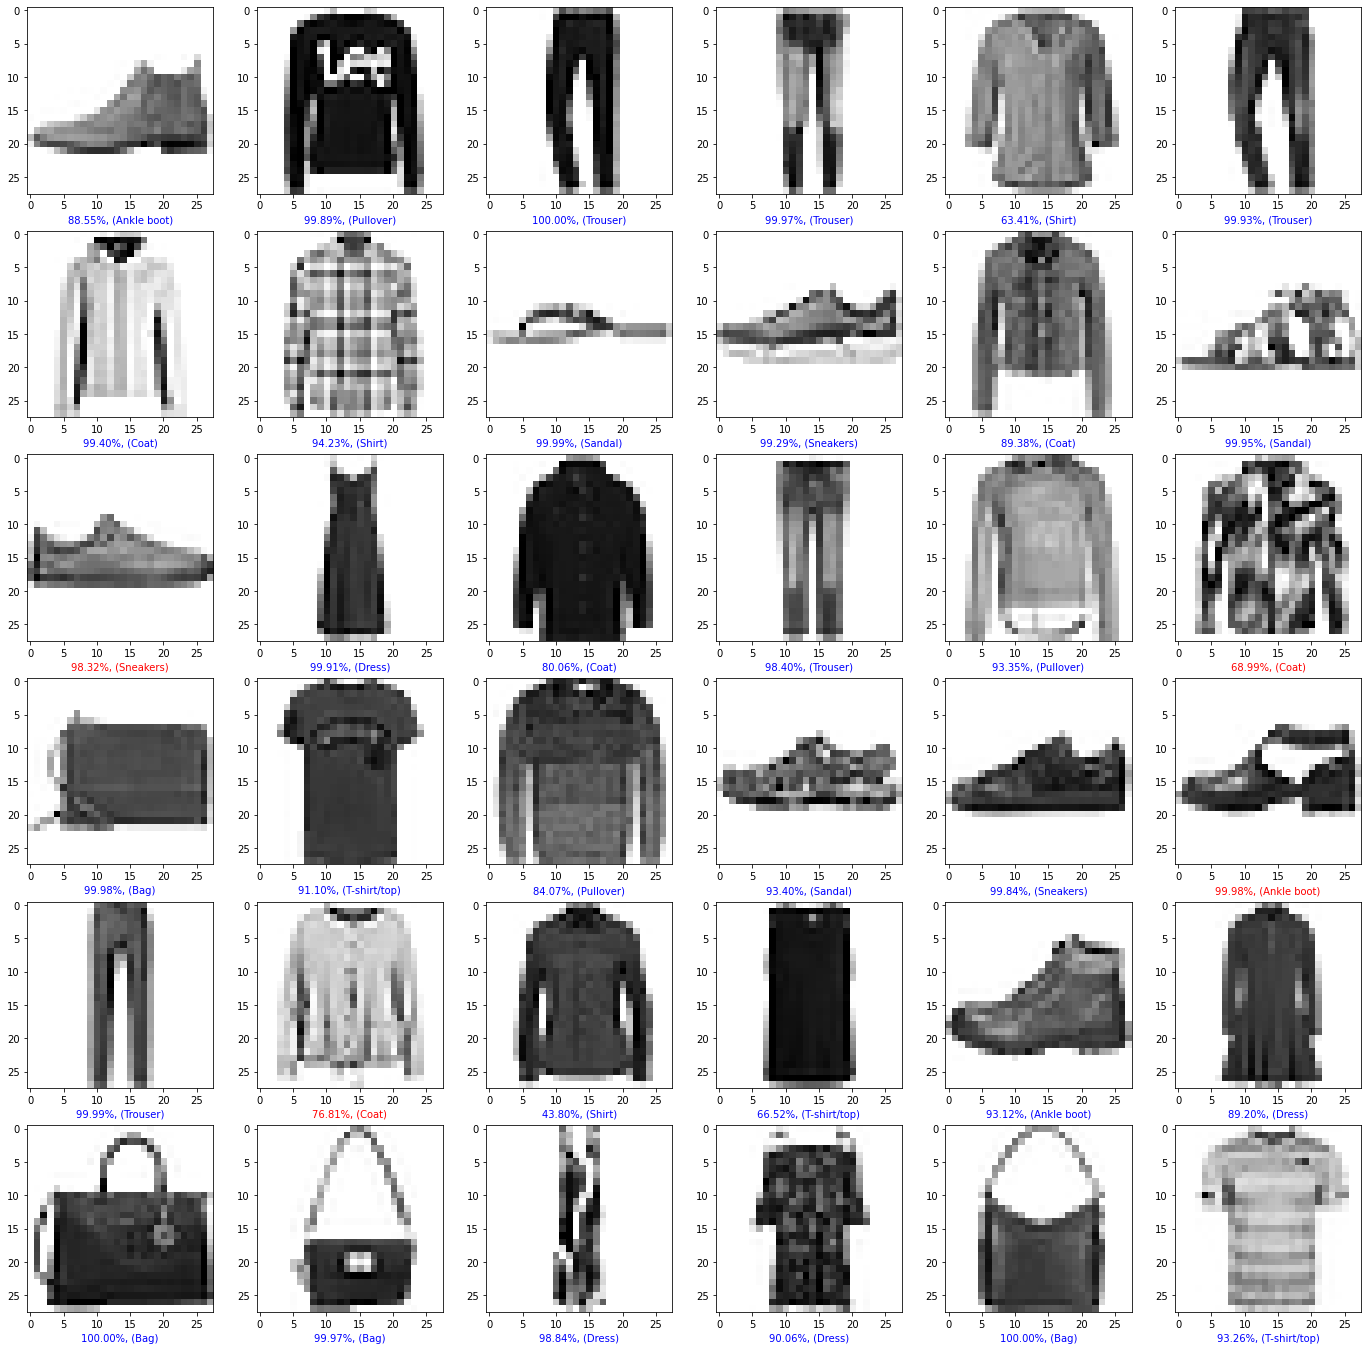

In [47]:
plt.figure(figsize=(24,24))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  if np.argmax(predictions[i])==test_labels[i]:
    plt.xlabel("{:0.2f}%, ({})".format(100*np.max(predictions[i]), class_names[test_labels[i]]), color='blue')
  else:
    plt.xlabel("{:0.2f}%, ({})".format(100*np.max(predictions[i]), class_names[test_labels[i]]), color='red')

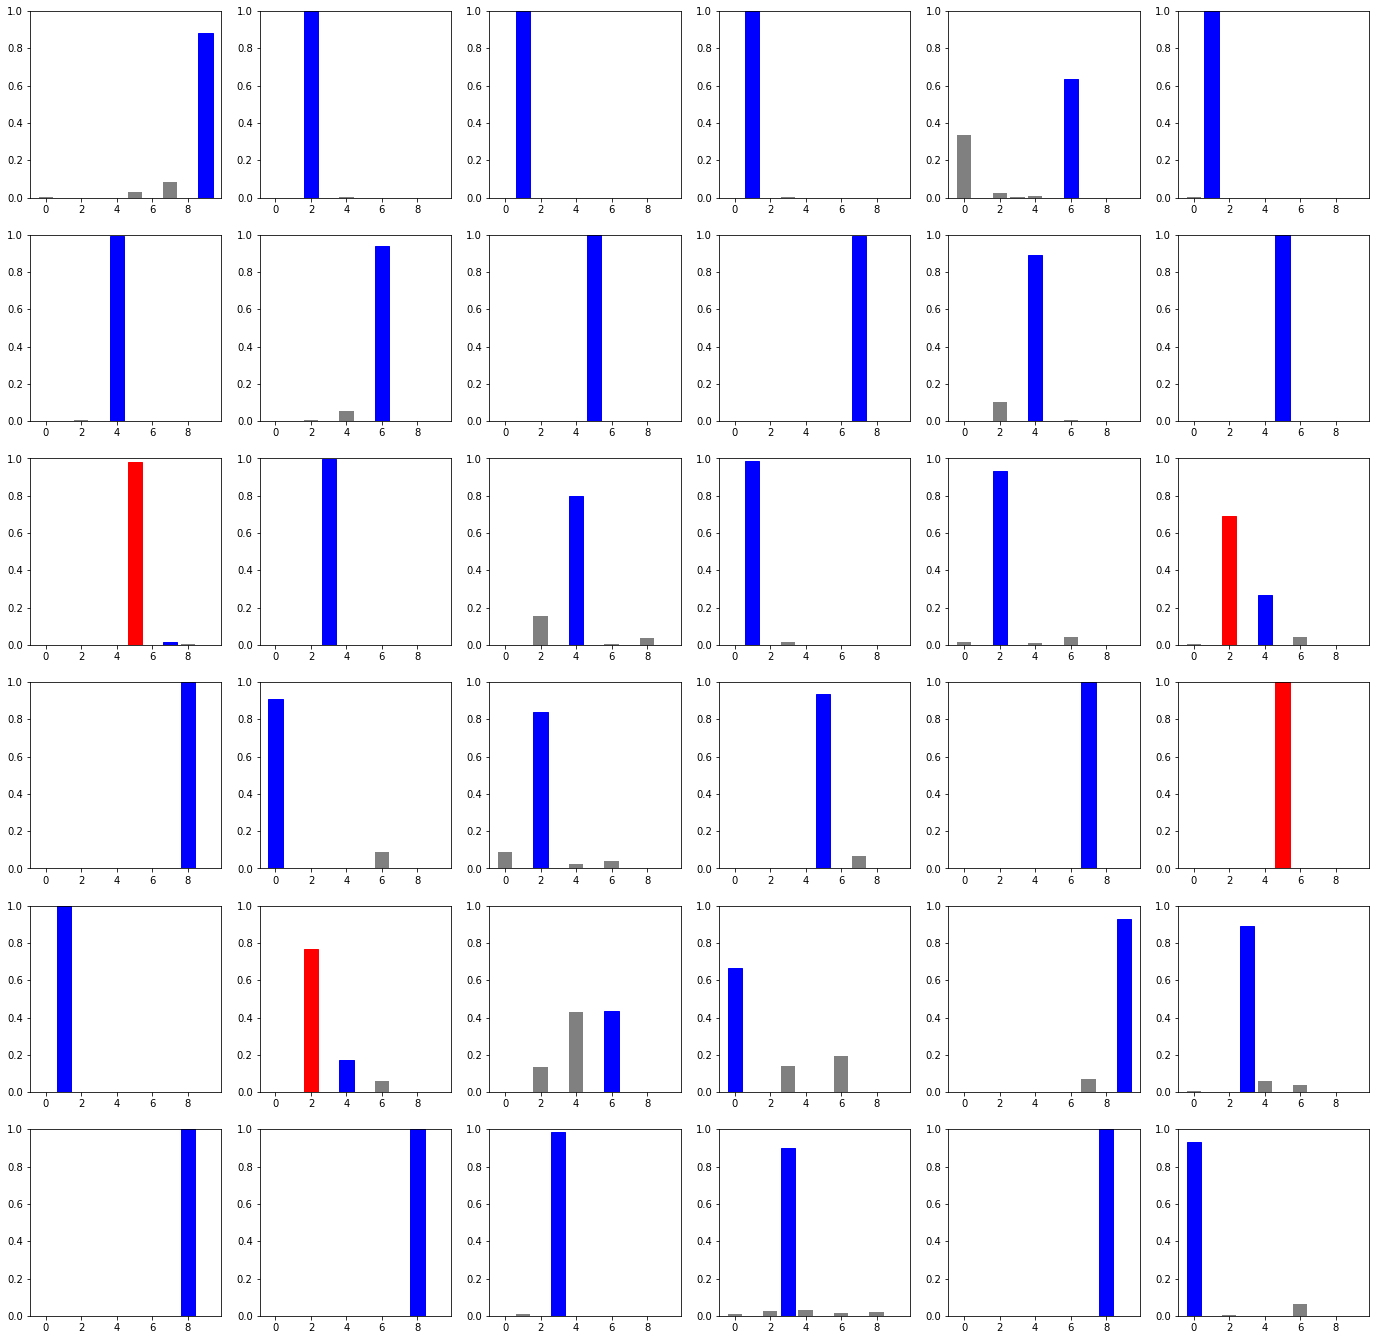

In [51]:
plt.figure(figsize=(24,24))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.ylim([0,1])
  thisplot = plt.bar(range(10), predictions[i], color = 'gray')
  if np.argmax(predictions[i])==test_labels[i]:
    thisplot[test_labels[i]].set_color('blue')
  else:
    thisplot[test_labels[i]].set_color('blue')
    thisplot[np.argmax(predictions[i])].set_color('red')

In [52]:
sample_img = np.expand_dims(test_images[0], axis=0)

In [53]:
sample_img.shape

(1, 28, 28)

In [55]:
sample_predict = model.predict(sample_img)

In [56]:
print(sample_predict[0])

[2.7688788e-04 1.7125641e-08 7.5613815e-07 5.8435923e-08 3.6495139e-06
 3.1482235e-02 5.1628453e-05 8.2605354e-02 1.2909262e-04 8.8545036e-01]


In [57]:
np.argmax(sample_predict[0])

9